In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jainrajat909017","key":"c92a5bafdf4b4eef328e71054bb10dd5"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 79% 73.0M/92.0M [00:00<00:00, 55.1MB/s]
100% 92.0M/92.0M [00:00<00:00, 99.8MB/s]
 84% 65.0M/77.3M [00:01<00:00, 37.6MB/s]
100% 77.3M/77.3M [00:01<00:00, 57.0MB/s]
 97% 94.0M/96.6M [00:01<00:00, 44.6MB/s]
100% 96.6M/96.6M [00:02<00:00, 50.1MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 6.01MB/s]
 88% 17.0M/19.3M [00:00<00:00, 40.8MB/s]
100% 19.3M/19.3M [00:00<00:00, 64.4MB/s]


In [4]:
from zipfile import ZipFile
train = 'train.csv.zip'
test = 'test.csv.zip'

with ZipFile(train,'r') as zip:
  zip.extractall()
  print("Done")

with ZipFile(test,'r') as zip:
  zip.extractall()
  print("Done")


Done
Done


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation,BatchNormalization
from keras.utils import np_utils
import tensorflow


In [19]:
dtrain = pd.read_csv('train.csv').values
dtest = pd.read_csv('test.csv').values

dtrain.shape, dtest.shape


((28709, 2), (7178, 1))

In [20]:
# print(dtrain[:3])
Y_train = dtrain[:,0]

dtrain = dtrain[:,1:]

print(dtrain.shape,Y_train.shape)
print(dtest.shape)

(28709, 1) (28709,)
(7178, 1)


In [0]:
# print(dtrain[0].shape)


In [0]:
def cleanDataset(df):
  X = np.zeros((df.shape[0],48*48))
  for i in range(df.shape[0]):
      t = df[i][0].split(' ')
      for it in range(len(t)):
          val = int(t[it])
          X[i][it] = val
  return X

In [0]:
X_train = cleanDataset(dtrain)
X_test = cleanDataset(dtest)


In [25]:
print(X_train.shape,X_test.shape)

(28709, 2304) (7178, 2304)


In [28]:
labels = {
    0 : 'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'
}
labels

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [0]:
# Visualization
def visualize():
  plt.style.use('grayscale')
  for i in range(15):
    plt.subplot(3,5,i+1)
    k = random.randint(0,X_train.shape[0])
    img = X_train[k].reshape(48,48)
    title = labels[Y_train[k]]
    plt.axis('off')
    plt.title(title)
    plt.imshow(img)
  plt.show()

In [0]:
# plt.style.available?

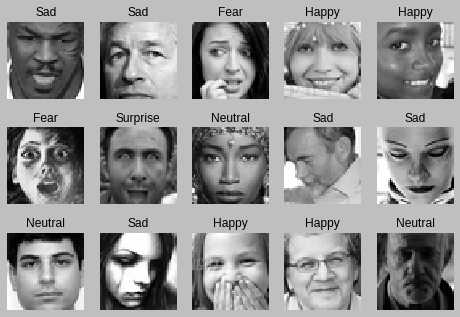

In [86]:
visualize()

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(X_train,Y_train,test_size=0.20)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(22967, 2304) (22967,)
(5742, 2304) (5742,)


In [50]:
print(ytrain.shape,ytest.shape)

ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

print(ytrain.shape,ytest.shape)

(22967,) (5742,)
(22967, 7) (5742, 7)


In [54]:
xtrain = xtrain.reshape((-1,48,48,1))
xtest = xtest.reshape((-1,48,48,1))
print(xtrain.shape,xtest.shape)

(22967, 48, 48, 1) (5742, 48, 48, 1)


## Model Architecture

In [0]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [0]:
batch_size = 32
classes = len(labels)
steps = xtrain.shape[0]//batch_size
epochs = 25
# classes

In [61]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)       

In [0]:
checkpoint = ModelCheckpoint('modelCheckPoint/ExpressionsModel.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=9,verbose=1,
                               min_delta=0,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks = [early_stopping,checkpoint,reduce_lr]

In [0]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(xtrain,ytrain,batch_size,epochs,callbacks=callbacks,validation_data=[xtest,ytest])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 22967 samples, validate on 5742 samples
Epoch 1/25
22967/22967 [==============================] - 688s 30ms/step - loss: 2.0501 - acc: 0.2643 - val_loss: 1.5194 - val_acc: 0.4171

Epoch 00001: val_loss improved from inf to 1.51941, saving model to modelCheckPoint/ExpressionsModel.h5
Epoch 2/25
22967/22967 [==============================] - 681s 30ms/step - loss: 1.5272 - acc: 0.4098 - val_loss: 1.3390 - val_acc: 0.4864

Epoch 00002: val_loss improved from 1.51941 to 1.33895, saving model to modelCheckPoint/ExpressionsModel.h5
Epoch 3/25
22967/22967 [==============================] - 680s 30ms/step - loss: 1.3733 - acc: 0.4744 - val_loss: 1.2699 - val_acc: 0.5240

Epoch 00003: val_loss improved from 1.33895 to 1.26994, saving model to modelCheckPoint/ExpressionsModel.h5
Epoch 4/25
22967/22967 [==============================] - 680s 30ms/step - loss: 1.2879 - acc: 0.5114 - val_loss: 1

In [0]:
y_pred = model.predict(X_test.reshape((-1,48,48,1)))

In [72]:
print(y_pred.shape)

(7178, 7)


In [73]:
print(y_pred[0])

[0.11633833 0.02813746 0.496861   0.05420671 0.14385252 0.07562943
 0.0849745 ]


In [0]:
Y_pred = []

for i in range(y_pred.shape[0]):
  Y_pred.append(np.argmax(y_pred[i]))


In [84]:
Y_pred = np.asarray(Y_pred)
print(Y_pred.shape)

(7178,)


In [85]:
print(np.unique(Y_pred,return_counts=True))

(array([0, 2, 3, 4, 5, 6]), array([ 985,  637, 2188, 1292,  830, 1246]))


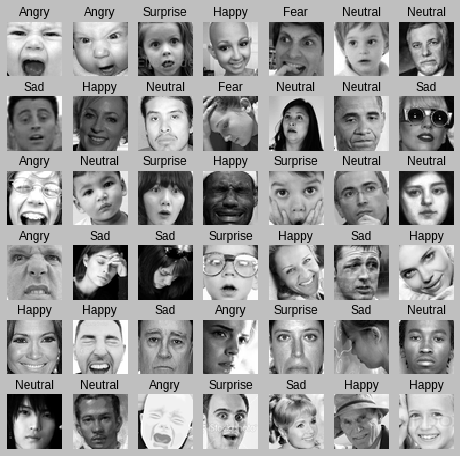

In [100]:
plt.style.use('grayscale')
plt.figure(figsize=(8,8))
for i in range(42):
  plt.subplot(6,7,i+1)
  k = random.randint(0,X_test.shape[0])
  img = X_test[k].reshape(48,48)
  title = labels[Y_pred[k]]
  plt.axis('off')
  plt.title(title)
  plt.imshow(img)
plt.show()

In [0]:
# Algorithm is doing Preety Good